# RQ4 : Analisi giustificazioni

### Importo le librerie che mi serviranno

In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

### Setup dati

In [462]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

carico i vari dataframe

In [463]:

# dataframe totale

df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)


In [464]:
# dataframe sovra_categorie
'''
df_true = pd.read_csv(folder+"df_true.csv", sep=',').drop(columns=['Unnamed: 0'])
df_false = pd.read_csv(folder+"df_false.csv", sep=',').drop(columns=['Unnamed: 0'])
'''

'\ndf_true = pd.read_csv(folder+"df_true.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\ndf_false = pd.read_csv(folder+"df_false.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\n'

In [465]:
# dataframe sotto_categorie
'''
df_wrong_false = df_all[df_all["quartile"] == "wrong_false"]
df_correct_false = df_all[df_all["quartile"] == "correct_false"]
df_wrong_true = df_all[df_all["quartile"] == "wrong_true"]
df_correct_true = df_all[df_all["quartile"] == "correct_true"]
'''

'\ndf_wrong_false = df_all[df_all["quartile"] == "wrong_false"]\ndf_correct_false = df_all[df_all["quartile"] == "correct_false"]\ndf_wrong_true = df_all[df_all["quartile"] == "wrong_true"]\ndf_correct_true = df_all[df_all["quartile"] == "correct_true"]\n'

## Funzioni che mi serviranno 

### Funzione per visualizzare il dataframe

In [466]:
colonne_da_NON_visualizzare = ['unit_id','worker_id', 'paid', 'batch_name', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_fact_check_source',
       'doc_speaker_name', 
       'doc_statement_description', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_label', 'doc_unbiasedness_index',
       'doc_unbiasedness_description', 'doc_accuracy_value',
       'doc_accuracy_label', 'doc_accuracy_index', 'doc_accuracy_description',
       "doc_speaker's-trustworthiness_value",
       "doc_speaker's-trustworthiness_label",
       "doc_speaker's-trustworthiness_index",
       "doc_speaker's-trustworthiness_description", 'doc_truthfulness_value',
       'doc_truthfulness_label', 'doc_truthfulness_index',
       'doc_truthfulness_description', 'doc_confidence_value',
       'doc_confidence_label', 'doc_confidence_index',
       'doc_confidence_description', 'doc_accesses', 'doc_time_elapsed',
       'doc_time_start', 'doc_time_end', 'global_outcome',
       'global_form_validity', 'gold_checks', 'time_spent_check',
       'time_check_amount',"task_id"]


def visualizza_dataframe(df=df_all,n=10):
       display(df.drop(colonne_da_NON_visualizzare, axis=1).head(n))

funzioni per avere solo true e false

In [467]:
def visualizza_dataframe_true(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_false(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="pants-on-fire"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

In [468]:
def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_true(df=df_all,n=10):
       display(df[df["quartile"]=="correct_true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))
       
def visualizza_dataframe_wrong_false(df=df_all,n=10):
       display(df[df["quartile"]=="wrong_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

### Funzioni per il test di significatività

     test di Mann-Whitney u
     
Il test di Mann-Whitney U è un test non parametrico utilizzato per confrontare due campioni indipendenti e stabilire se esiste una differenza significativa tra di essi. In particolare, il test viene utilizzato per verificare se le mediane dei due campioni sono significativamente diverse.

In [469]:
from scipy.stats import mannwhitneyu

In [470]:
# group1 e group2 sono due liste di valori
# ritorna p-value => se p-value < 0.05 allora la mediana è significativamente diversa

def test_mann_whitney_u(group1,group2):
    stat, p = mannwhitneyu(group1, group2)
    return p

    prop test => test di differenza tra due porzioni
Valuta se delle proporzioni sono uguali (p1 = p2 = p3 = .. pk) => ipotesi nulla o se esite una proporzioni significativamente diversa salle altre (ipotesi alternativa) 

In [471]:
import statsmodels.stats.proportion as ssp

In [472]:
# si applica a una specifica dimensione e si passa in input le frequenze assolute di ogni valore della dimensione

# count = particolare (wt/wf/mt/mf)
# nobs = totale di riferimento (true / false)
# ritorna p-value => se p-value < 0.05 allora c'è una proporzione significativamente diversa

def prop_test(count,nobs):
    (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
    return p

In [473]:
def prop_test_all(count,nobs):
    test_results  = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
    return test_results 

    p trend test => test 
permette di verificare la presenza di una tendenza lineare tra le proporzioni(l’ipotesi nulla è che non vi sia alcuna tendenza tra di esse; l’alternativa è che vi sia un aumento/decremento lineare della proporzione man mano che si sale/scende nelle categorie. Questo test è da eseguire solo se la variabile categoriale considerata è ordinale.)

In [474]:
from scipy.stats import pearsonr

In [475]:
# tred test

def tred_test(count,nobs):
    corr, pval = corr, pval = pearsonr(count,nobs)
    return pval

### Funzioni per plot di grafici

In [476]:
# imposto dimensione delle figure e stile
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'figure.figsize':(4.7,3.27)}
sns.set_theme(style="ticks", rc=custom_params)


    funzione per generare strip plot (solo puntini) con:
- y = mean della correttezza
- x = quartili
- colori = valori di una dimensione (considerata)

In [477]:
# df_sovra = True o False
# dimensione = dimensione considerata

def plot_strip_plot(df, dimensione, x_value, x_filter = None, y_value = "mean", valori_dimensione = None, order = None):
   
    if order == None:
       order = list(df[x_value].unique())
    
    if valori_dimensione is not None:
        
        tutti = df[dimensione].unique()
        da_tenere = []
        for val in tutti:
            if val not in valori_dimensione:
                da_tenere.append(val) 
                
        for val in da_tenere:
            df = df.loc[df[dimensione] != val]
    
    
    if x_filter is not None:
        diff = order.copy()
        for val in x_filter:
            
            diff.remove(val)
        for val in diff:
            df = df.loc[df[x_value] != val]
            order.remove(val)
    
    ax = sns.stripplot(y=y_value, x=x_value, data=df, hue=dimensione ,jitter=0.1, size=8, order=order, palette="Set2")
    # show the graph
    plt.title(dimensione+" "+x_value, loc="center")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.tick_params(axis='x', rotation=60)
    plt.show()

    funzione per generare un boxplot + stripplot di una dimensione di interesse:
- y = dimensione di interesse
- x = quartitli (wt,wf,ct,wt)

In [478]:
def plot_boxplot(df, dimensione):

    ax = sns.boxplot(palette = "deep",x="quartile", y=dimensione, data=df,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
    
    ax = sns.stripplot(palette = ["black"],x="quartile", y=dimensione, data=df, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

    # add title
    plt.title(dimensione, loc="left")
    # show the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

    funzione per creare barplot di confronto

In [479]:

from matplotlib.colors import to_rgba

def crea_barplot(raccoglitore_dimensioni,dimensione,max_value,min_value):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

    fig.tight_layout(pad=5.0)
        
    for quartile in quartili:
        
        sub = raccoglitore_dimensioni[dimensione][quartile].sort_values("valore", ascending=False)
        sub_freq_rel = []
        for index, row in sub.iterrows():
            for col in ["freq_rel_quartile"]:
                new_row = [row["valore"],col, sub.at[index,col]]
                sub_freq_rel.append(new_row)

        sub_freq_rel = pd.DataFrame(sub_freq_rel, columns=["valore", "colonna", "frequenza"])
        sub_freq_rel = sub_freq_rel.sort_values(by=["valore"], ascending=True)
        
        if quartile == "wrong_false":
            i = 0
            j = 0
        elif quartile == "wrong_true":
            i = 0
            j = 1
        elif quartile == "correct_false":
            i = 1
            j = 0
        elif quartile == "correct_true":
            i = 1
            j = 1
               
        sns.barplot(data=sub_freq_rel,y = "valore", x = "frequenza", hue ="colonna",orient="h", ax=ax[i,j], palette=["g","indianred", "goldenrod"])   
        
        
        if min_value == 0:
            ax[i,j].set_ylim(max_value + 0.5,min_value-0.5)
        else:
            ax[i,j].set_ylim(max_value - 0.3,min_value-1.5)
              
        ax[i,j].set_title(dimensione + " -- " + quartile)
    
    # sistemo legende
    for i in range(2):
        for j in range(2):
            if i == 1 and j == 1:
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
            else:
                ax[i,j].get_legend().remove()
        
    
   
    plt.show()

     funzione per creare box plot + stripplot

In [480]:
def crea_boxplot_e_stripplot(df, x_dimensione, y_dimensione):

    ax = sns.boxplot(palette = "pastel",x=x_dimensione, y=y_dimensione, data=df)
    
    ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, alpha=0.95)

    # add title
    plt.title("title", loc="left")
    ax.tick_params(axis='x', rotation=90)
    # show the graph
    plt.show()

### Funzioni di supporto

Funzione per determinare frequenza assoluta

    Funzione per determinare la frequenza assoluta
- data una dimensione da analizzare
- dato il valore di interesse

calcola la frequenza assoluta del valore rispetto al totale --> numero di occorrenze di un valore nel df

In [481]:
def calcola_frequenza_assoluta(df, dimensione, valore_dimensione, sovra_categoria):
        if sovra_categoria == 'all':
                sub = df
                #sub = df.drop_duplicates(subset=['doc_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        else:
                sub = df[df['quartile'] == sovra_categoria]
                #sub = sub.drop_duplicates(subset=['doc_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        

    Funzione per aggiungere un valore a una determinata colonna di una determinata riga di un dataframe 

In [482]:
# scorro df ipotizzando che il valore di doc_id sia unico

def aggiungi_valore(df,colonna,valore,doc_id):
    df.loc[df['doc_id'] == doc_id, colonna] = valore
    return df

    Ordina tabella secondo una dimensione

In [483]:
def ordina_tabella(df,dimensione,ordine):
    df = df.sort_values(by=[dimensione], ascending=ordine)
    return df

    voglio una tabella che mi dica per ogni valore considerato di una dimensione:
- frequenza assoluta del valore nella sotto categoria
- frequenza assoluta del valore nella sovra categoria
- frequenza assoluta del valore in generale (tutto)

df => df_all

In [484]:
def crea_subDF_con_frequenze(df, sovra_categoria, quartile, dimensione):
    res_assolute = []
    res_relative = []
    for valore_dimensione in df[dimensione].unique():
        freq_ass_all = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, "all")
        freq_ass_sovra = calcola_frequenza_assoluta(df[df["doc_fact_check_ground_truth_label"] == sovra_categoria], dimensione, valore_dimensione, "all")
        freq_ass_quartile = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, quartile)
        res_assolute.append([valore_dimensione,freq_ass_all,freq_ass_sovra,freq_ass_quartile])  
    
    res_assolute = pd.DataFrame(res_assolute, columns=["valore", "freq_ass_all", "freq_ass_sovra", "freq_ass_quartile"])     
    
    res_relative = []
    for col in res_assolute.columns[1:]:
        
        tot = res_assolute[col].sum()
        colonna = []
        for val in res_assolute[col]:
            colonna.append(val/tot)    
        res_relative.append(colonna)
            
    res_relative = pd.DataFrame(res_relative).T
    res_relative.columns = ["freq_rel_all", "freq_rel_sovra", "freq_rel_quartile"]

    sub = pd.concat([res_assolute, res_relative], axis=1, join='inner')
    return ordina_tabella(sub,"valore",True)

In [485]:
crea_subDF_con_frequenze(df_all, "pants-on-fire", "wrong_false", "doc_index")

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,0.0,153,30,10,0.127606,0.150754,0.20
6,1.0,146,20,4,0.121768,0.100503,0.08
3,2.0,143,19,3,0.119266,0.095477,0.06
4,3.0,154,27,4,0.128440,0.135678,0.08
7,4.0,149,21,11,0.124270,0.105528,0.22
5,5.0,152,32,9,0.126772,0.160804,0.18
0,6.0,150,23,5,0.125104,0.115578,0.10
1,7.0,152,27,4,0.126772,0.135678,0.08


    aggiungi roba al df all

In [486]:
# unisci due df tramite colonna_uguale

def aggiungi_colonna(df_totale,df_secondario, colonna,colonna_uguale_primo, colonna_uguale_secondario):
    df_totale[str(colonna)] = 1

    for index, row in df_totale.iterrows():
        id = row[str(colonna_uguale_primo)]
        df_totale.at[index,str(colonna)] = df_secondario[df_secondario[str(colonna_uguale_secondario)] == id][str(colonna)].values[0]

# Analisi

In [487]:
df_answer = pd.read_csv("../../data/prolific/Dataframe/workers_answers.csv")

In [488]:
df_url = pd.read_csv("../../data/prolific/Dataframe/workers_urls.csv")

In [489]:
# url selezionato da ciascun worker
df_answer[(df_answer["worker_id"] == "62c61250e85c96fc1794c7db") & (df_answer["doc_id"] == "jim-jordan-says-seven-nations-10-wealthiest-counti")]["doc_evidence_url"].unique()

array(['https://www.cleveland.com/open/2013/01/rep_jim_jordan_says_seven_of_t.html'],
      dtype=object)

sistemo dati

In [490]:
for w_id in df_url["worker_id"].unique():
    print(w_id, df_url[df_url["worker_id"] == w_id]["query_index"].unique())

62c61250e85c96fc1794c7db [0]
6272919c35ab7659d0754c07 [1 0]
5d338bb02381b7001761694e [0 2 3 1]
5e531b2205acdb33c0f5f24c [0 1]
627935c4e5d7e70b502e206e [1 3 5]
61151fdceebe67102a0983ad [0 2 4 5]
615dbf532dce1f14ef1b3ddc [0 1 2 4]
62c8d23e8eb59ca0306d4463 [0 1]
5c55c45f53fba80001bcf323 [0 1]
62ffe924cae68af25dd6c1d3 [ 0  1  3  2  4  7  8  9 11 13 14]
5e556536e1cbcd56c3a50342 [0 1 2 3 4 5 7]
58d9a79c33fef3000118abdf [0 1 2]
6298f812c9026fec4b2f028f [0]
5e7a6846f0f631000a4e2b9d [0 1]
62ee44b74f44e600e27a3507 [1 3 5 2 0 4]
62b0b9d60841bfa66838f436 [0]
58f0fca0d40252000192f201 [0 1]
60fe12e72041bc1636d08771 [0 1 2 3 4 5]
5dfd077e3690bd03bfa91d48 [0]
62da96ec6d17660ed2b57be6 [0 1 3]
60fde74940100db428b34a06 [0 1 2]
627524293d738cdeebb0d481 [0]
62fe9bebf5d09924e321a32c [0 2 3 4 5 6 7 1]
6273366f084fd44cef93529d [0 1]
5dd3cfb7b103ee3b428185b2 [1 3 0 2 4 6]
62ef2768d2ff53772298a265 [0 1]
56f9364e895094000c8f4967 [0 1]
6290ecde88d58cd1e5ce00e7 [0 2 4 1 3]
5e46d70ab1f1c5000d96800d [0]
62dbdb8628c8

In [491]:
df_url[df_url["worker_id"] == "62c61250e85c96fc1794c7db"]

,worker_id,paid,try_last,try_current,document_index,document_id,dimension_index,dimension_name,query_index,query_text,query_timestamp,query_timestamp_parsed,response_index,response_url,response_name,response_snippet,response_uuid,index_selected
0,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,0,https://www.poynter.org/fact-checking/2022/rus...,A Putin spokesman says 'Russia has never attac...,âWe remind you that Russia has never attacke...,0563e1fb-8f6d-4de9-9ad2-b399a455658d,0
1,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,1,https://www.newswise.com/factcheck/the-claim-t...,"The claim that ""Russia, throughout all of its ...","Claim Publisher and Date: Dmitry Peskov, Russi...",c016fb30-7685-4363-b73f-e94470baf96b,-1
2,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,2,https://www.quora.com/Do-Russians-believe-that...,Do Russians believe that âRussia has never a...,Answer (1 of 13): I am sure that Russians beli...,ebd22740-eaf1-46cf-8524-71d3eb4cf3c9,-1
3,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,3,https://www.republicworld.com/world-news/russi...,"Russia never attacked anyone, says Kremlin; sl...",Kremlin spokesperson Dmitry Peskov on Sunday s...,656c1d10-5d28-409c-a773-16f09ace73ed,-1
4,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,4,https://www.wral.com/fact-check-putin-spokesma...,Fact check: Putin spokesman says Russia 'never...,"""We remind you that Russia has never attacked ...",137fb9c8-f55e-445e-8ca6-a431f0afb940,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,62c61250e85c96fc1794c7db,False,1,1,5,greene-twists-logic-and-facts-pedophilia-charg...,0,evidence,0,"Says Sens. Lisa Murkowski, Susan Collins and M...",1.661255e+09,1970-01-20 06:27:35,10,https://www.dailymail.co.uk/news/article-10688...,Marjorie Taylor Greene says Republican colleag...,Marjorie Taylor Greene says GOP colleagues Rom...,616d0230-8572-4779-8f47-ccc065b8cbdf,-1
114,62c61250e85c96fc1794c7db,False,1,1,5,greene-twists-logic-and-facts-pedophilia-charg...,0,evidence,0,"Says Sens. Lisa Murkowski, Susan Collins and M...",1.661255e+09,1970-01-20 06:27:35,11,https://www.deseret.com/2022/4/6/23012121/mitt...,"Marjorie Taylor Greene calls Mitt Romney, Keta...",GOP Rep. Marjorie Taylor Greene called Romney ...,7725eb84-c378-4ea6-bc58-18d01928ac8b,-1
115,62c61250e85c96fc1794c7db,False,1,1,5,greene-twists-logic-and-facts-pedophilia-charg...,0,evidence,0,"Says Sens. Lisa Murkowski, Susan Collins and M...",1.661255e+09,1970-01-20 06:27:35,12,https://www.rollingstone.com/politics/politics...,Marjorie Taylor Greene Is Melting Down Over Ke...,"Murkowski, Collins, and Romney are pro-pedophi...",34a71f72-abfd-4220-a88c-2141b81e623b,-1
116,62c61250e85c96fc1794c7db,False,1,1,5,greene-twists-logic-and-facts-pedophilia-charg...,0,evidence,0,"Says Sens. Lisa Murkowski, Susan Collins and M...",1.661255e+09,1970-01-20 06:27:35,13,https://crooksandliars.com/2022/04/marge-green...,Marge Greene Smears Fellow Republicans As 'Pro...,"They just voted for #KBJ,"" tweeted Greene, a p...",ddd7ea47-1e43-4be0-83b3-4dfb42ed867a,-1


In [492]:
df_url[(df_url["worker_id"] == "62c61250e85c96fc1794c7db") & (df_url["document_id"] == "jim-jordan-says-seven-nations-10-wealthiest-counti")]

,worker_id,paid,try_last,try_current,document_index,document_id,dimension_index,dimension_name,query_index,query_text,query_timestamp,query_timestamp_parsed,response_index,response_url,response_name,response_snippet,response_uuid,index_selected
29,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,0,https://www.outsidethebeltway.com/seven-of-the...,Seven Of The Ten Wealthiest Counties In The U....,"In 2007, before the recession began, five coun...",376c7f7b-69f9-4d24-bbf2-a30ba52c9e38,-1
30,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,1,https://www.washingtonpost.com/local/seven-of-...,Seven of nationâs 10 most affluent counties ...,"Ted Mellnik. September 20, 2012. The Washingto...",7fa32869-1a38-4aee-b6e6-c86c6fa7550d,-1
31,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,2,https://www.cleveland.com/open/2013/01/rep_jim...,Rep. Jim Jordan says seven of the nation's 10 ...,Rep. Jim Jordan says seven of the nation's 10 ...,c5106019-51e3-406a-ac45-dcc4a4ff1398,0
32,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,3,https://shareholding-icosahedra.blogspot.com/2...,Jim Jordan: Seven of America?s 10 wealthiest c...,Jim Jordan: Seven of America?s 10 wealthiest c...,35878673-7964-407c-a86a-1c4de90f235a,-1
33,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,4,https://checkyourfact.com/2017/09/11/fact-chec...,FACT CHECK: Are âSeven Of The Nineâ Wealth...,"In an interview on 60 Minutes Sunday, former W...",6478e6e1-181f-4975-8258-31cda6956470,-1
34,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,5,https://www.washingtonexaminer.com/washington-...,Swamp's gold: 6 of 10 richest counties in Amer...,"The Washington, D.C. area, home to the federal...",0a55f588-507b-4a05-95be-b8db6a4464c6,-1
35,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,6,https://benchmarkrealtytn.com/americas-richest...,Americaâs 10 Richest Counties | Benchmark Re...,In a study based on household income estimates...,ae05655e-86bc-4533-a0da-1f46be3a3aa5,-1
36,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,7,https://www.c21ag.com/americas-richest-counties/,America's 10 Richest Counties - CENTURY 21 Adv...,"There are 3,033 counties in the United States....",6ab81326-1809-4fae-8a2a-92f1d6232fe4,-1
37,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,8,https://hatkoffrealestateinvestments.com/ranki...,America's 10 Richest Counties - Brian Hatkoff,In a study based on household income estimates...,d47cce4f-ac2f-43c7-a874-a08d2bd77c1f,-1
38,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,9,https://www.washingtonexaminer.com/6-of-the-10...,6 of the 10 richest counties in U.S. are in DC...,"Loudoun, Fairfax lead U.S. in median income. S...",6118a7cd-

In [493]:
for w_id in df_url["worker_id"].unique():
    print(df_url[(df_url["worker_id"] == w_id) & (df_url["document_id"] == "jim-jordan-says-seven-nations-10-wealthiest-counti")]["query_text"].unique())

['Seven of Americaâ\x80\x99s 10 wealthiest counties are in the Washington, D.C., area. Jim Jordan']
[]
[]
[]
[]
[]
[]
[]
[]
['Jim Jordan' 'United States most wealthiest counties']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[': Seven of Americaâ\x80\x99s 10 wealthiest counties are in the Washington, D.C., area.']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Jim Jordan America wealthiest counties']
[]
[]
['jim jordan DC wealthiest counties']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Seven of Americaâ\x80\x99s 10 wealthiest counties are in the Washington, D.C., area.']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Seven of Americaâ\x80\x99s 10 wealthiest counties are in the Washington, D.C., area']
[]
[]
[]
[]
[]
[]
[]
['Americaâ\x80\x99s 10 wealthiest counties']
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [494]:
df_url.head(5)

,worker_id,paid,try_last,try_current,document_index,document_id,dimension_index,dimension_name,query_index,query_text,query_timestamp,query_timestamp_parsed,response_index,response_url,response_name,response_snippet,response_uuid,index_selected
0,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,0,https://www.poynter.org/fact-checking/2022/rus...,A Putin spokesman says 'Russia has never attac...,âWe remind you that Russia has never attacke...,0563e1fb-8f6d-4de9-9ad2-b399a455658d,0
1,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,1,https://www.newswise.com/factcheck/the-claim-t...,"The claim that ""Russia, throughout all of its ...","Claim Publisher and Date: Dmitry Peskov, Russi...",c016fb30-7685-4363-b73f-e94470baf96b,-1
2,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,2,https://www.quora.com/Do-Russians-believe-that...,Do Russians believe that âRussia has never a...,Answer (1 of 13): I am sure that Russians beli...,ebd22740-eaf1-46cf-8524-71d3eb4cf3c9,-1
3,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,3,https://www.republicworld.com/world-news/russi...,"Russia never attacked anyone, says Kremlin; sl...",Kremlin spokesperson Dmitry Peskov on Sunday s...,656c1d10-5d28-409c-a773-16f09ace73ed,-1
4,62c61250e85c96fc1794c7db,False,1,1,6,GOLD_LOW,0,evidence,0,âRussia has never attacked anyone throughout...,1.661255e+09,1970-01-20 06:27:35,4,https://www.wral.com/fact-check-putin-spokesma...,Fact check: Putin spokesman says Russia 'never...,"""We remind you that Russia has never attacked ...",137fb9c8-f55e-445e-8ca6-a431f0afb940,-1


In [495]:
colone_interessanti = ["worker_id","document_id","document_index","dimension_index","query_index","response_index","response_url","index_selected","response_snippet","response_name"]
df_url[colone_interessanti]

,worker_id,document_id,document_index,dimension_index,query_index,response_index,response_url,index_selected,response_snippet,response_name
0,62c61250e85c96fc1794c7db,GOLD_LOW,6,0,0,0,https://www.poynter.org/fact-checking/2022/rus...,0,âWe remind you that Russia has never attacke...,A Putin spokesman says 'Russia has never attac...
1,62c61250e85c96fc1794c7db,GOLD_LOW,6,0,0,1,https://www.newswise.com/factcheck/the-claim-t...,-1,"Claim Publisher and Date: Dmitry Peskov, Russi...","The claim that ""Russia, throughout all of its ..."
2,62c61250e85c96fc1794c7db,GOLD_LOW,6,0,0,2,https://www.quora.com/Do-Russians-believe-that...,-1,Answer (1 of 13): I am sure that Russians beli...,Do Russians believe that âRussia has never a...
3,62c61250e85c96fc1794c7db,GOLD_LOW,6,0,0,3,https://www.republicworld.com/world-news/russi...,-1,Kremlin spokesperson Dmitry Peskov on Sunday s...,"Russia never attacked anyone, says Kremlin; sl..."
4,62c61250e85c96fc1794c7db,GOLD_LOW,6,0,0,4,https://www.wral.com/fact-check-putin-spokesma...,-1,"""We remind you that Russia has never attacked ...",Fact check: Putin spokesman says Russia 'never...
...,...,...,...,...,...,...,...,...,...,...
61699,629e3b29a4c6a6994feefef8,GOLD_LOW,5,0,0,15,https://news.myseldon.com/en/news/index/264500156,-1,The official representative of the Kremlin Dmi...,Dmitry Peskov: Russian Federation never anybod...
61700,629e3b29a4c6a6994feefef8,GOLD_LOW,5,0,0,16,https://thenewsglory.com/peskov-spoke-about-th...,-1,"Russia has never attacked anyone first, said o...",Peskov Spoke About The First Non-attacking Rus...
61701,629e3b29a4c6a6994feefef8,GOLD_LOW,5,0,0,17,https://fortune.com/2022/03/23/russia-nuclear-...,-1,When Putin signed Russiaâs 2020 military doc...,Dmitry Peskov's Russia nuclear threat should n...
61702,629e3b29a4c6a6994feefef8,GOLD_LOW,5,0,0,18,https://tass.com/politics/1497087,-1,The Russian Foreign Minister stressed that thi...,Medvedev says Russiaâs special operation sho...


come prima cosa eliminiamo i gold Low e gold high

In [496]:
df_url_analisi = df_url.copy()
df_url_analisi = df_url_analisi[(df_url_analisi["document_id"] != "GOLD_LOW") & (df_url_analisi["document_id"] != "GOLD_HIGH")]

In [497]:
df_url_analisi[colone_interessanti]

,worker_id,document_id,document_index,dimension_index,query_index,response_index,response_url,index_selected,response_snippet,response_name
29,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,0,https://www.outsidethebeltway.com/seven-of-the...,-1,"In 2007, before the recession began, five coun...",Seven Of The Ten Wealthiest Counties In The U....
30,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,1,https://www.washingtonpost.com/local/seven-of-...,-1,"Ted Mellnik. September 20, 2012. The Washingto...",Seven of nationâs 10 most affluent counties ...
31,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,2,https://www.cleveland.com/open/2013/01/rep_jim...,0,Rep. Jim Jordan says seven of the nation's 10 ...,Rep. Jim Jordan says seven of the nation's 10 ...
32,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,3,https://shareholding-icosahedra.blogspot.com/2...,-1,Jim Jordan: Seven of America?s 10 wealthiest c...,Jim Jordan: Seven of America?s 10 wealthiest c...
33,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,4,https://checkyourfact.com/2017/09/11/fact-chec...,-1,"In an interview on 60 Minutes Sunday, former W...",FACT CHECK: Are âSeven Of The Nineâ Wealth...
...,...,...,...,...,...,...,...,...,...,...
61679,629e3b29a4c6a6994feefef8,tulsi-gabbard-falsely-claims-us-not-so-differe...,4,0,0,12,https://www.houstonchronicle.com/politics/texa...,-1,"The March 15 claim by Gabbard, a former congre...",Fact check: Free speech in Russia ânot so di...
61680,629e3b29a4c6a6994feefef8,tulsi-gabbard-falsely-claims-us-not-so-differe...,4,0,0,13,http://town.billerica.ma.us/513/Mosquito-Control,-1,Larval mosquito control is underway in the Tow...,"Mosquito Control | Billerica, MA - Official We..."
61681,629e3b29a4c6a6994feefef8,tulsi-gabbard-falsely-claims-us-not-so-differe...,4,0,0,14,https://pest-control-billerica-ma.plfastjq.com/,-1,Pest Control Billerica Ma - If you are looking...,Pest Control Billerica Ma ð¥ Aug 2022
61682,629e3b29a4c6a6994feefef8,tulsi-gabbard-falsely-claims-us-not-so-differe...,4,0,0,15,https://www.yellowpages.com/billerica-ma/voice...,-1,"Voice Mail, Messaging Systems & Services. Webs...",Voice Mail Messaging Systems Services in Bille...


In [498]:
df_url_analisi["worker_id"].value_counts()

62da0d692b89efcaba51846d    845
616c056b42e788ef31efc4b0    829
6112ffdc288bd3e0ab310e22    729
5e7027c5a2522d000bddb8f3    624
5d7ff85ffec5620017b07c40    608
                           ... 
611eeb35a6288fcbe35bd45c     68
62eafaf1c492443983b3557f     54
5cfb5233df7d70001619ca90     50
62bd1d1283b326cde10cf27a     50
5d2eac390aca250001e9c3e1     34
Name: worker_id, Length: 236, dtype: int64

In [499]:
df_url_analisi["document_id"].value_counts()

sen-stephen-wise-says-everybody-death-row-was-fost    1629
iran-aint-miami-beach-but-beatings-and-killings-fo    1172
john-boehner-says-stimulus-bill-was-rushed-passage     929
nrsc-exaggerates-effect-beasley-rulings-sex-offens     786
crist-touts-cover-florida-cost-saving-health-care-     766
                                                      ... 
david-perdue-distorts-facts-georgia-agreement-abse     205
state-crime-lab-doing-less-testing-and-generally-t     194
virginia-975-abortions-occur-15-weeks-pregnancy-or     150
pennsylvania-us-senate-candidate-kathy-barnette-wa     147
checking-beasley-votes-armed-kidnapper-and-double-     139
Name: document_id, Length: 120, dtype: int64

In [500]:
df_url_analisi[df_url_analisi["worker_id"] == "62c61250e85c96fc1794c7db"]["document_id"].value_counts()

recent-report-put-texas-last-among-states-and-dc-m    18
jim-jordan-says-seven-nations-10-wealthiest-counti    15
neo-nazi-and-racial-discrimination-claims-az-gover    15
fact-checking-omalleys-claim-hillary-clinton-flips    15
greene-twists-logic-and-facts-pedophilia-charge-ag    15
fact-checking-charlie-crists-claim-desantis-hasnt-    11
Name: document_id, dtype: int64

In [501]:
df_url_analisi[df_url_analisi["worker_id"] == "62c61250e85c96fc1794c7db"][colone_interessanti]

,worker_id,document_id,document_index,dimension_index,query_index,response_index,response_url,index_selected,response_snippet,response_name
29,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,0,https://www.outsidethebeltway.com/seven-of-the...,-1,"In 2007, before the recession began, five coun...",Seven Of The Ten Wealthiest Counties In The U....
30,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,1,https://www.washingtonpost.com/local/seven-of-...,-1,"Ted Mellnik. September 20, 2012. The Washingto...",Seven of nationâs 10 most affluent counties ...
31,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,2,https://www.cleveland.com/open/2013/01/rep_jim...,0,Rep. Jim Jordan says seven of the nation's 10 ...,Rep. Jim Jordan says seven of the nation's 10 ...
32,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,3,https://shareholding-icosahedra.blogspot.com/2...,-1,Jim Jordan: Seven of America?s 10 wealthiest c...,Jim Jordan: Seven of America?s 10 wealthiest c...
33,62c61250e85c96fc1794c7db,jim-jordan-says-seven-nations-10-wealthiest-co...,0,0,0,4,https://checkyourfact.com/2017/09/11/fact-chec...,-1,"In an interview on 60 Minutes Sunday, former W...",FACT CHECK: Are âSeven Of The Nineâ Wealth...
...,...,...,...,...,...,...,...,...,...,...
113,62c61250e85c96fc1794c7db,greene-twists-logic-and-facts-pedophilia-charg...,5,0,0,10,https://www.dailymail.co.uk/news/article-10688...,-1,Marjorie Taylor Greene says GOP colleagues Rom...,Marjorie Taylor Greene says Republican colleag...
114,62c61250e85c96fc1794c7db,greene-twists-logic-and-facts-pedophilia-charg...,5,0,0,11,https://www.deseret.com/2022/4/6/23012121/mitt...,-1,GOP Rep. Marjorie Taylor Greene called Romney ...,"Marjorie Taylor Greene calls Mitt Romney, Keta..."
115,62c61250e85c96fc1794c7db,greene-twists-logic-and-facts-pedophilia-charg...,5,0,0,12,https://www.rollingstone.com/politics/politics...,-1,"Murkowski, Collins, and Romney are pro-pedophi...",Marjorie Taylor Greene Is Melting Down Over Ke...
116,62c61250e85c96fc1794c7db,greene-twists-logic-and-facts-pedophilia-charg...,5,0,0,13,https://crooksandliars.com/2022/04/marge-green...,-1,"They just voted for #KBJ,"" tweeted Greene, a p...",Marge Greene Smears Fellow Republicans As 'Pro...


In [502]:
df_url_analisi["response_name"].unique()[1]

'Seven of nationâ\x80\x99s 10 most affluent counties are in Washington region'

In [503]:
len(df_url_analisi["query_text"].unique())
# "commenti" degli utenti
df_url_analisi["query_text"].unique()[1]

'Kari Lake has been appearing at rallies with neo-Nazis," while "two federal juries have found" Katie Hobbs.  Aaron Lieberman'

In [504]:
df_url_analisi["dimension_name"].unique()
# inutile

array(['evidence'], dtype=object)

In [505]:
df_url_analisi["query_text"].unique()

array(['Seven of Americaâ\x80\x99s 10 wealthiest counties are in the Washington, D.C., area. Jim Jordan',
       'Kari Lake has been appearing at rallies with neo-Nazis," while "two federal juries have found" Katie Hobbs.  Aaron Lieberman',
       "Secretary Clinton changes her position on (gun issues) every election year, it seems, having one position in 2000 and then campaigning against President Obama and saying we don't need federal standards.  Martin O'Malley",
       ..., 'ron johnson tax carve out', 'mehmet oz pro abortion',
       'tulsi gabbard state tv controlled messaging'], dtype=object)

In [506]:
df_url_analisi

,worker_id,paid,try_last,try_current,document_index,document_id,dimension_index,dimension_name,query_index,query_text,query_timestamp,query_timestamp_parsed,response_index,response_url,response_name,response_snippet,response_uuid,index_selected
29,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,0,https://www.outsidethebeltway.com/seven-of-the...,Seven Of The Ten Wealthiest Counties In The U....,"In 2007, before the recession began, five coun...",376c7f7b-69f9-4d24-bbf2-a30ba52c9e38,-1
30,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,1,https://www.washingtonpost.com/local/seven-of-...,Seven of nationâs 10 most affluent counties ...,"Ted Mellnik. September 20, 2012. The Washingto...",7fa32869-1a38-4aee-b6e6-c86c6fa7550d,-1
31,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,2,https://www.cleveland.com/open/2013/01/rep_jim...,Rep. Jim Jordan says seven of the nation's 10 ...,Rep. Jim Jordan says seven of the nation's 10 ...,c5106019-51e3-406a-ac45-dcc4a4ff1398,0
32,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,3,https://shareholding-icosahedra.blogspot.com/2...,Jim Jordan: Seven of America?s 10 wealthiest c...,Jim Jordan: Seven of America?s 10 wealthiest c...,35878673-7964-407c-a86a-1c4de90f235a,-1
33,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,4,https://checkyourfact.com/2017/09/11/fact-chec...,FACT CHECK: Are âSeven Of The Nineâ Wealth...,"In an interview on 60 Minutes Sunday, former W...",6478e6e1-181f-4975-8258-31cda6956470,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,12,https://www.houstonchronicle.com/politics/texa...,Fact check: Free speech in Russia ânot so di...,"The March 15 claim by Gabbard, a former congre...",79638517-5531-49ef-91d4-323fc3abd95d,-1
61680,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,13,http://town.billerica.ma.us/513/Mosquito-Control,"Mosquito Control | Billerica, MA - Official We...",Larval mosquito control is underway in the Tow...,b2a0ace0-afd9-4f6d-a0e6-a6d8e1071451,-1
61681,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,14,https://pest-control-billerica-ma.plfastjq.com/,Pest Control Billerica Ma ð¥ Aug 2022,Pest Control Billerica Ma - If you are looking...,b367af31-8723-4806-8227-ecf2244df59d,-1
61682,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,15,https://www.yellowpages.com/billerica-ma/voice...,Voice Mail Messaging Systems Services in Bille...,"Voice Mail, Messaging Systems & Services. Webs...",72500712-f341-43ee-8161-790aea25195c,-1


valori delle colonne:
- worker_id => id del worker (unico per ciascuno)
- (paid => mi dice se il worker è stato pagato => solo FALSE)
- try_last e try_current => tentativi fatti da utente
- document_index => posizione con cui il documento viene presentato all'utente 
- document_id => id univoco del documento
- (dimension_index => insex della dimensione di analisi => solo "0")
- (dimension_name => neame della dimensione che stiamo analizzanado => solo "evidence")
- query_index =>
- query_text => è la query inserita dall'utente per cercare un url con evidenza
- query_timestamp => tempo di consegna
- response_index => indice con cui vengono presentati gli url all'utente
- response_url =>  contiene tutti gli url presentati all'utente dopo una query cercata per un dato documento che deve valutare
- response_name => titolo del contenuto del link, che appare nella visualizzazione dei risultati delle query
- response_snippet => frammento del contenuto del link, che appare nella visualizzazione dei risultati delle query
- response_uuid => univoco della riga
- index_selected => -1 se non è quella selezionata, 0 se è quella selezionata

In [507]:

# calcolo query_amount per ciasun worker
# query_amount = numero di ricerche effettuate sul motore di ricerca

df_url_analisi["query_amount_for_worker"] = 0
df_url_analisi["query_amount_for_doc_and_worker"] = 0

for w_id in df_url_analisi["worker_id"].unique():
    n = len(df_url_analisi[df_url_analisi["worker_id"] == w_id]["query_text"].unique())
    df_url_analisi.loc[df_url_analisi["worker_id"] == w_id, "query_amount_for_worker"] = n
    for doc_id in df_url_analisi[df_url_analisi["worker_id"] == w_id]["document_id"].unique():
        n = len(df_url_analisi[(df_url_analisi["worker_id"] == w_id) & (df_url_analisi["document_id"] == doc_id)]["query_text"].unique())
        df_url_analisi.loc[(df_url_analisi["worker_id"] == w_id) & (df_url_analisi["document_id"] == doc_id), "query_amount_for_doc_and_worker"] = n

In [508]:
df_url_analisi

,worker_id,paid,try_last,try_current,document_index,document_id,dimension_index,dimension_name,query_index,query_text,query_timestamp,query_timestamp_parsed,response_index,response_url,response_name,response_snippet,response_uuid,index_selected,query_amount_for_worker,query_amount_for_doc_and_worker
29,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,0,https://www.outsidethebeltway.com/seven-of-the...,Seven Of The Ten Wealthiest Counties In The U....,"In 2007, before the recession began, five coun...",376c7f7b-69f9-4d24-bbf2-a30ba52c9e38,-1,6,1
30,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,1,https://www.washingtonpost.com/local/seven-of-...,Seven of nationâs 10 most affluent counties ...,"Ted Mellnik. September 20, 2012. The Washingto...",7fa32869-1a38-4aee-b6e6-c86c6fa7550d,-1,6,1
31,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,2,https://www.cleveland.com/open/2013/01/rep_jim...,Rep. Jim Jordan says seven of the nation's 10 ...,Rep. Jim Jordan says seven of the nation's 10 ...,c5106019-51e3-406a-ac45-dcc4a4ff1398,0,6,1
32,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,3,https://shareholding-icosahedra.blogspot.com/2...,Jim Jordan: Seven of America?s 10 wealthiest c...,Jim Jordan: Seven of America?s 10 wealthiest c...,35878673-7964-407c-a86a-1c4de90f235a,-1,6,1
33,62c61250e85c96fc1794c7db,False,1,1,0,jim-jordan-says-seven-nations-10-wealthiest-co...,0,evidence,0,Seven of Americaâs 10 wealthiest counties ar...,1.661255e+09,1970-01-20 06:27:34,4,https://checkyourfact.com/2017/09/11/fact-chec...,FACT CHECK: Are âSeven Of The Nineâ Wealth...,"In an interview on 60 Minutes Sunday, former W...",6478e6e1-181f-4975-8258-31cda6956470,-1,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61679,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,12,https://www.houstonchronicle.com/politics/texa...,Fact check: Free speech in Russia ânot so di...,"The March 15 claim by Gabbard, a former congre...",79638517-5531-49ef-91d4-323fc3abd95d,-1,7,1
61680,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,13,http://town.billerica.ma.us/513/Mosquito-Control,"Mosquito Control | Billerica, MA - Official We...",Larval mosquito control is underway in the Tow...,b2a0ace0-afd9-4f6d-a0e6-a6d8e1071451,-1,7,1
61681,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,14,https://pest-control-billerica-ma.plfastjq.com/,Pest Control Billerica Ma ð¥ Aug 2022,Pest Control Billerica Ma - If you are looking...,b367af31-8723-4806-8227-ecf2244df59d,-1,7,1
61682,629e3b29a4c6a6994feefef8,False,1,1,4,tulsi-gabbard-falsely-claims-us-not-so-differe...,0,evidence,0,tulsi gabbard state tv controlled messaging,1.661260e+09,1970-01-20 06:27:40,15,https://www.yellowpages.com/billerica-ma/voice...,Voice Mail Messaging Systems Services in Bille...,"Voice Mail, Messaging Systems & Services. Webs...",72500712-f341-43ee-8161-790aea25195c,-1,7,1


In [509]:

# calcolo selected amount per ciasun worker
# selected_amount =  Il numero di volte che l’utente ha selezionato link di giustificazione

df_url_analisi["selected_amount_for_worker"] = 0
df_url_analisi["selected_amount_for_doc_and_worker"] = 0

for w_id in df_url_analisi["worker_id"].unique():
    
    n = len(df_url_analisi[(df_url_analisi["worker_id"] == w_id) & (df_url_analisi["index_selected"] == 0)])
    df_url_analisi.loc[df_url_analisi["worker_id"] == w_id, "selected_amount_for_worker"] = n
    
    for doc_id in df_url_analisi[df_url_analisi["worker_id"] == w_id]["document_id"].unique():
            n = len(df_url_analisi[(df_url_analisi["worker_id"] == w_id) & (df_url_analisi["document_id"] == doc_id) & (df_url_analisi["index_selected"] == 0)])
            df_url_analisi.loc[(df_url_analisi["worker_id"] == w_id) & (df_url_analisi["document_id"] == doc_id), "selected_amount_for_doc_and_worker"] = n

In [510]:
for w_id in df_url_analisi["worker_id"].unique():
    print(w_id, df_url_analisi[df_url_analisi["worker_id"] == w_id]["selected_amount_for_doc_and_worker"].unique(),df_url_analisi[df_url_analisi["worker_id"] == w_id]["selected_amount_for_worker"].unique())

62c61250e85c96fc1794c7db [1] [6]
6272919c35ab7659d0754c07 [1] [6]
5d338bb02381b7001761694e [1] [6]
5e531b2205acdb33c0f5f24c [1] [6]
627935c4e5d7e70b502e206e [1 0] [5]
61151fdceebe67102a0983ad [1] [6]
615dbf532dce1f14ef1b3ddc [1] [6]
62c8d23e8eb59ca0306d4463 [1] [6]
5c55c45f53fba80001bcf323 [2 3] [13]
62ffe924cae68af25dd6c1d3 [1] [6]
5e556536e1cbcd56c3a50342 [1] [6]
58d9a79c33fef3000118abdf [1] [6]
6298f812c9026fec4b2f028f [1] [6]
5e7a6846f0f631000a4e2b9d [1] [6]
62ee44b74f44e600e27a3507 [1] [6]
62b0b9d60841bfa66838f436 [1] [6]
58f0fca0d40252000192f201 [1] [6]
60fe12e72041bc1636d08771 [1] [6]
5dfd077e3690bd03bfa91d48 [1] [6]
62da96ec6d17660ed2b57be6 [1] [6]
60fde74940100db428b34a06 [1] [6]
627524293d738cdeebb0d481 [1] [6]
62fe9bebf5d09924e321a32c [1] [6]
6273366f084fd44cef93529d [1] [6]
5dd3cfb7b103ee3b428185b2 [1 0] [5]
62ef2768d2ff53772298a265 [1 0] [5]
56f9364e895094000c8f4967 [3 0] [15]
6290ecde88d58cd1e5ce00e7 [1] [2]
5e46d70ab1f1c5000d96800d [1] [6]
62dbdb8628c86b2a3824da16 [1] [6

response_position = response_index

In [511]:
df_url_analisi["doc_fact_check_ground_truth_label"] = 0
df_url_analisi["quartile"] = 0

for document_id in df_url_analisi["document_id"].unique():
    df_url_analisi.loc[df_url_analisi["document_id"] == document_id, "doc_fact_check_ground_truth_label"] = df_all[df_all["doc_id"] == document_id]["doc_fact_check_ground_truth_label"].values[0]
    df_url_analisi.loc[df_url_analisi["document_id"] == document_id, "quartile"] = df_all[df_all["doc_id"] == document_id]["quartile"].values[0]

## Frequenze relative

In [512]:
dimensioni_da_analizzare = ["response_index","query_amount_for_doc_and_worker","selected_amount_for_doc_and_worker"]

In [513]:
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]

In [514]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_url_analisi, sovra, quartile, dimensione)

In [515]:
# esempio
raccoglitore_dimensioni["response_index"]["wrong_true"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
0,0,6110,1015,266,0.069578,0.072345,0.074510
1,1,24071,3824,948,0.274110,0.272559,0.265546
2,2,6737,1050,265,0.076718,0.074840,0.074230
3,3,5511,914,251,0.062757,0.065146,0.070308
4,4,5225,869,233,0.059500,0.061939,0.065266
5,5,4898,791,208,0.055776,0.056379,0.058263
6,6,4575,741,196,0.052098,0.052815,0.054902
7,7,4180,682,178,0.047600,0.048610,0.049860
8,8,3765,613,159,0.042874,0.043692,0.044538
9,9,3401,550,145,0.038729,0.039202,0.040616


In [516]:
for quartile in quartili:
    display(raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"])

1       0
0    1512
2     104
3      45
4     124
Name: freq_ass_quartile, dtype: int64

1      31
0    1791
2     266
3      60
4       0
Name: freq_ass_quartile, dtype: int64

1       9
0    1734
2     331
3      54
4       0
Name: freq_ass_quartile, dtype: int64

1       9
0    1744
2     101
3     170
4       0
Name: freq_ass_quartile, dtype: int64

In [517]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value tra quartule vs all e sovra vs all
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])
        

In [518]:
significativi = []

valore_significativo = 0.05

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < valore_significativo:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi[significativi["confronto"] == "pvalue_quartile_sovra"].sort_values(by=["quartile"], ascending=True)


,dimensione,quartile,confronto,valore_pvalue
8,query_amount_for_doc_and_worker,correct_false,pvalue_quartile_sovra,6.043861e-170
20,selected_amount_for_doc_and_worker,correct_false,pvalue_quartile_sovra,5.811182e-25
14,query_amount_for_doc_and_worker,correct_true,pvalue_quartile_sovra,1.693457e-290
26,selected_amount_for_doc_and_worker,correct_true,pvalue_quartile_sovra,2.185565e-32
0,response_index,wrong_false,pvalue_quartile_sovra,8.311022e-07
5,query_amount_for_doc_and_worker,wrong_false,pvalue_quartile_sovra,2.381349e-88
17,selected_amount_for_doc_and_worker,wrong_false,pvalue_quartile_sovra,1.972818e-111
11,query_amount_for_doc_and_worker,wrong_true,pvalue_quartile_sovra,0.000000e+00
23,selected_amount_for_doc_and_worker,wrong_true,pvalue_quartile_sovra,1.258952e-35


In [519]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "other_false","correct_false","other","wrong_true", "other_true","correct_true"]

In [520]:
max_value = 0
dimensione = "query_amount_for_doc_and_worker"
for quartile in quartili:
    for index, row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
        if row["freq_rel_quartile"] > 0 and max_value < row["valore"]:
            max_value = row["valore"]
max_value

10.0

response_index 18.0 0.0 correct_false


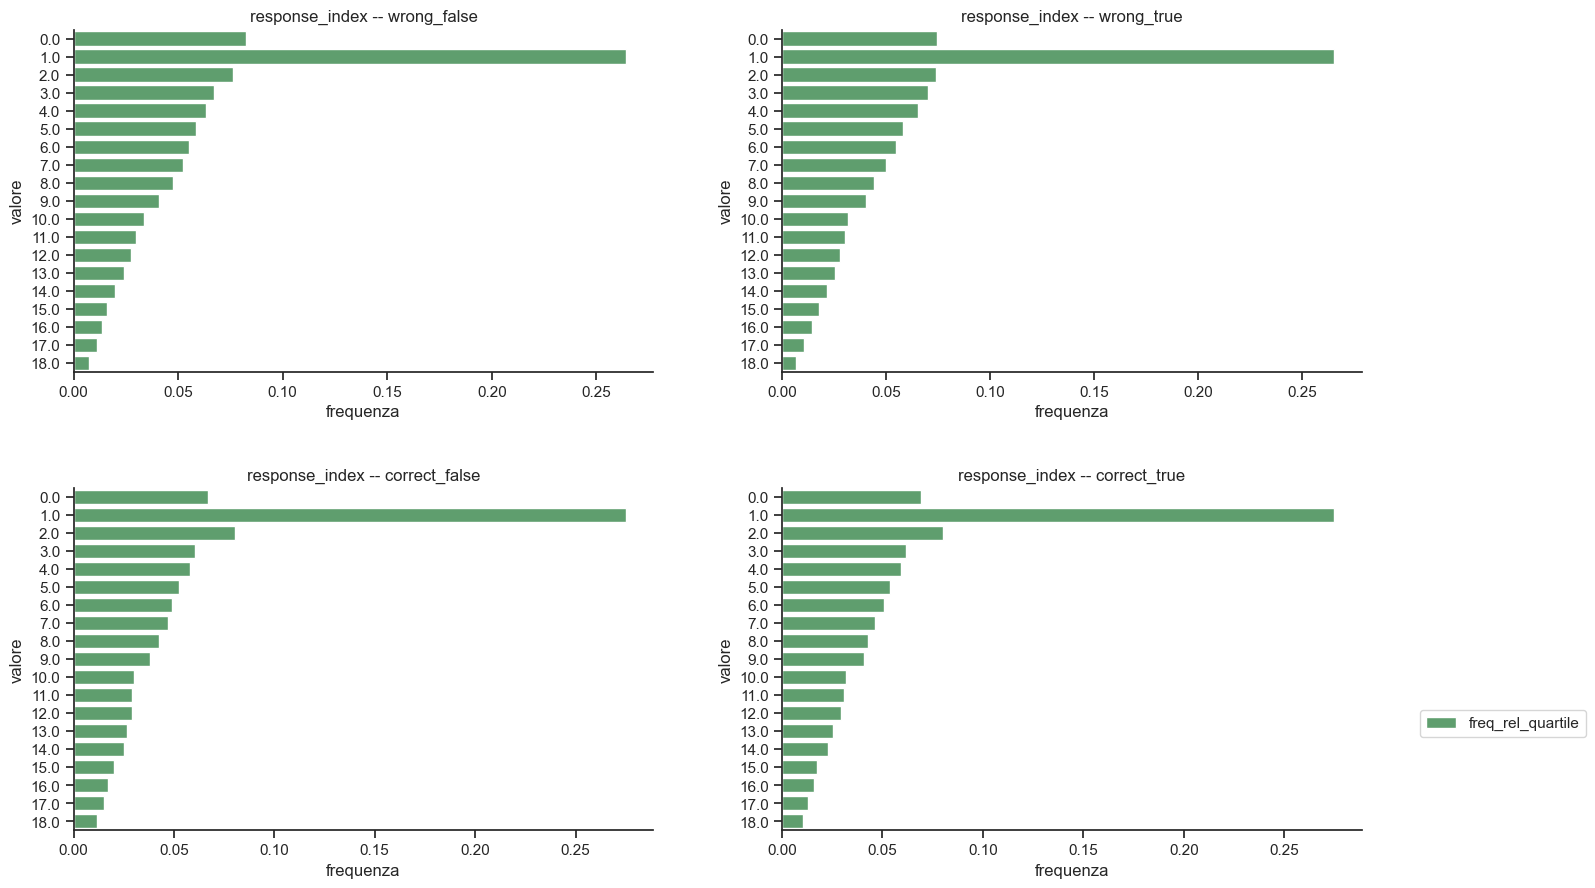

query_amount_for_doc_and_worker 10.0 1.0 wrong_true


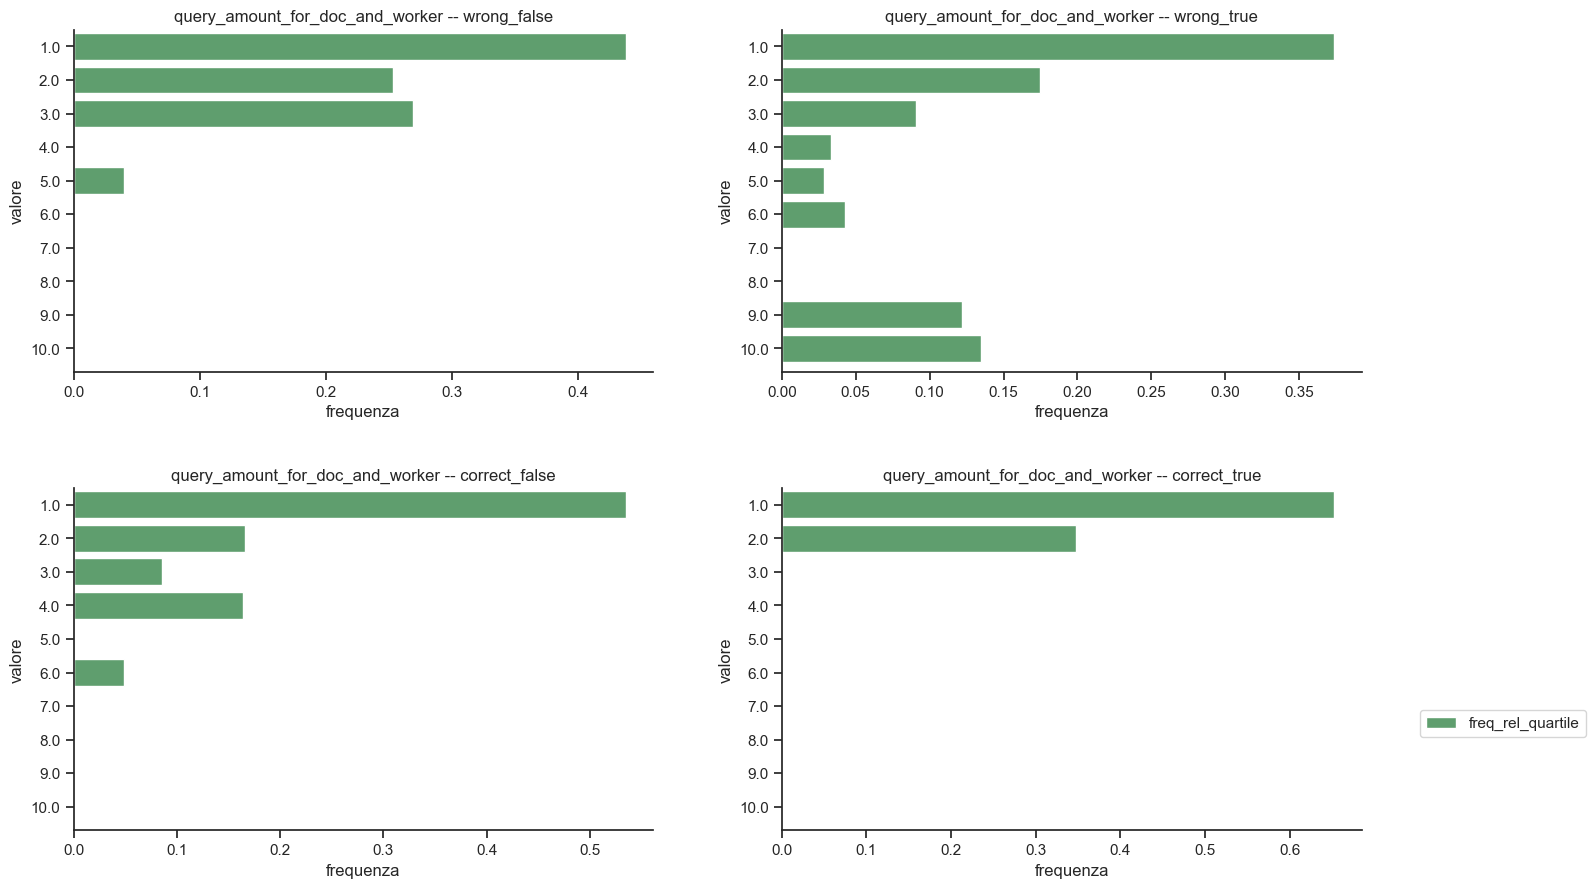

selected_amount_for_doc_and_worker 4.0 0.0 wrong_false


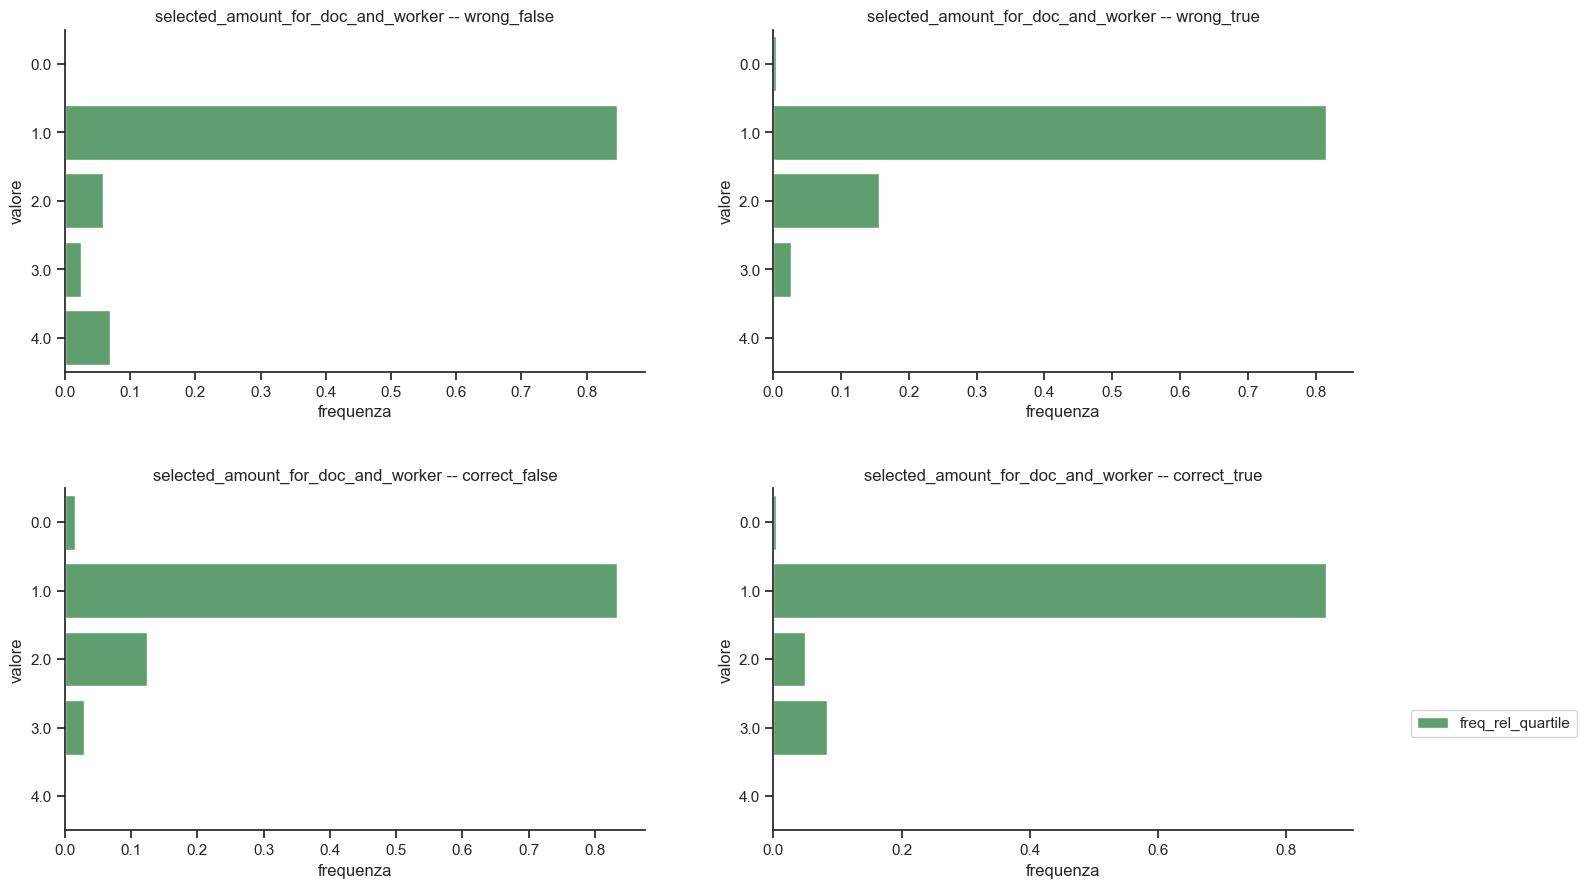

In [522]:
for dimensione in dimensioni_da_analizzare:
    max_value = 0
    min_value = 100
    quart = ""
    for quartile in quartili:
        limite = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"].sum() * 0.01
        for index, row in raccoglitore_dimensioni[dimensione][quartile].iterrows():
            if row["freq_ass_quartile"] > limite and max_value < row["valore"]:
                max_value = row["valore"]
                q = quartile
            if row["freq_ass_quartile"] > limite and min_value > row["valore"]:
                min_value = row["valore"]
    print(dimensione, max_value, min_value, q)        
    crea_barplot(raccoglitore_dimensioni, dimensione, max_value, min_value)